
# **Disclaimer:** #

It is important to note that while the analysis presented provides valuable insights into the soil characteristics along the selected transect lines in Bangor and Nant Peris, it is imperative to recognize that a single transect line may not comprehensively represent the entirety of soil types in both locations. Soil properties can exhibit significant variability over short distances due to factors such as microclimates, geological variations, and local land use practices. Therefore, the findings presented here offer a snapshot of the conditions along these specific transects and may not capture the full spectrum of soil characteristics within Bangor and Nant Peris. For a more comprehensive understanding, further studies incorporating a broader sampling approach and additional environmental variables are recommended.


In [ ]:
install.packages('reshape2')
install.packages("imager")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘Rcpp’




In [77]:
install.packages("gridExtra")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [78]:
library(ggplot2)
library(reshape2)
library(imager)
library(gridExtra)

# **Introduction**

The contrasting valley shapes of Bangor and Nant Peris, with the former being 'U'-shaped and the latter 'V'-shaped, likely have substantial implications on the environmental conditions and subsequently, the soil characteristics observed at both locations.

## Transects at Bangor and Nant Peris:##

The transects at Bangor and Nant Peris were strategically placed to cut across a section of the 'U'-shaped and 'V'-shaped valleys, respectively. The Bangor transect consisted of 12 sample points, while the Nant Peris transect included 11 sample points. This approach ensured a comprehensive representation of the varied topographical features within each valley.

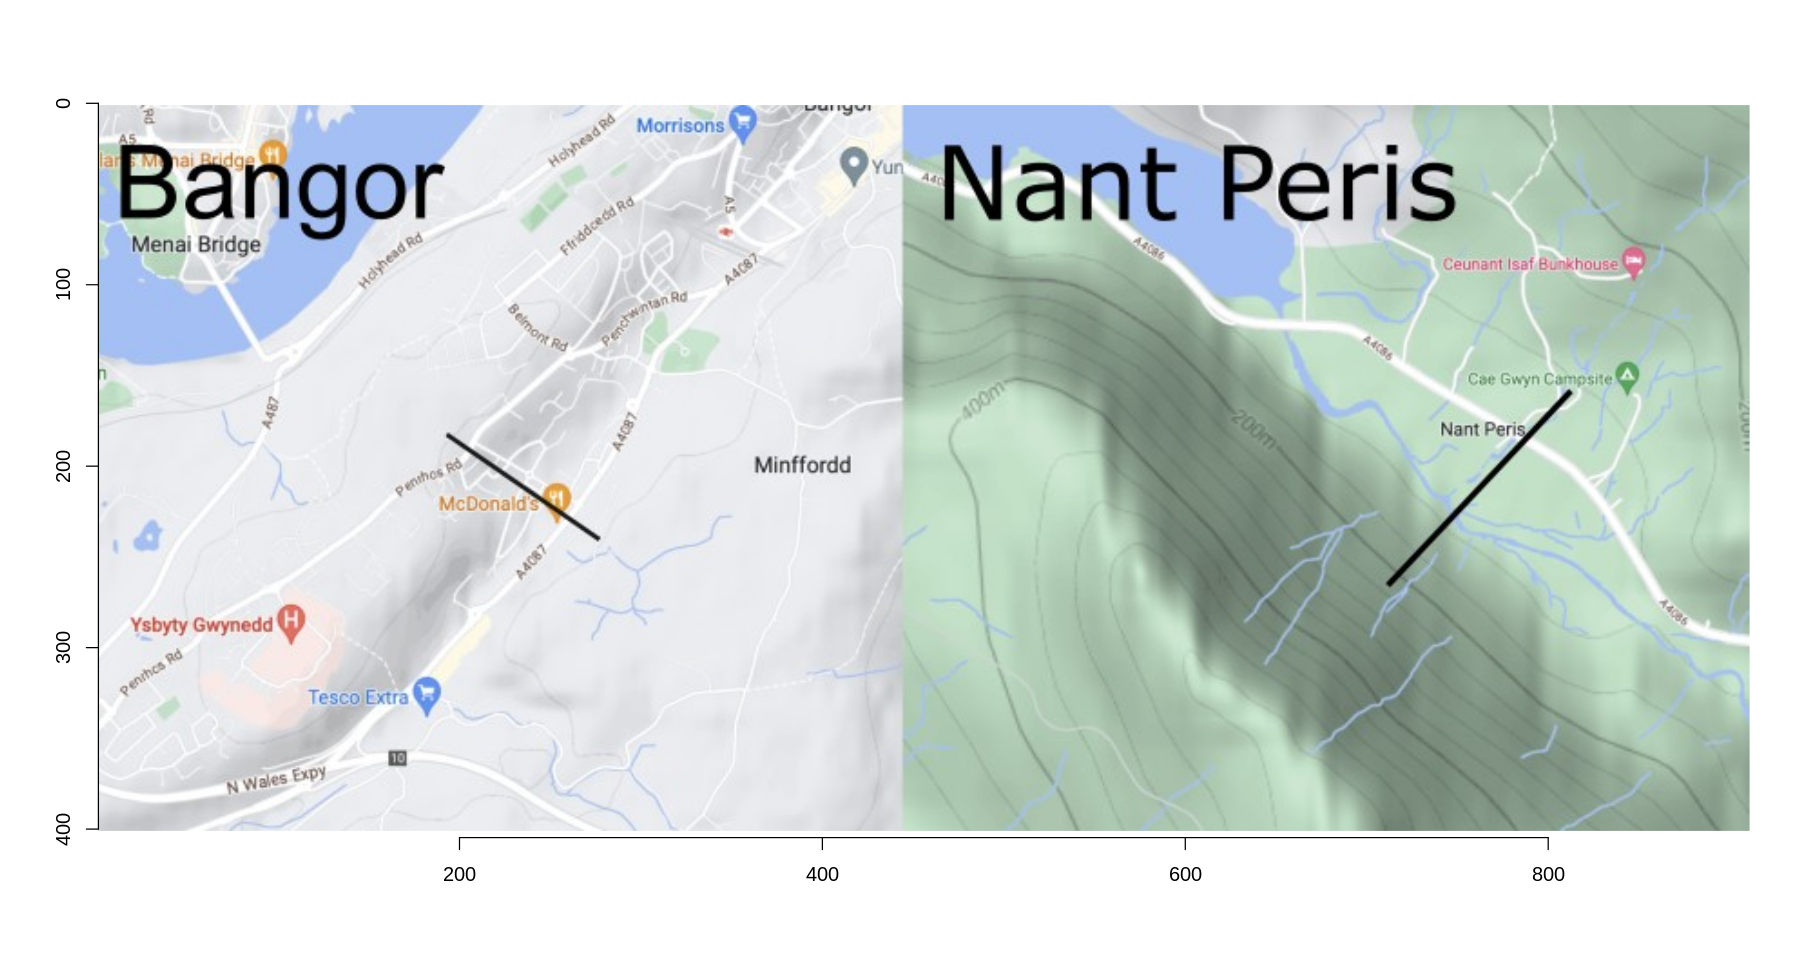

In [69]:
imgs_transect <- load.image("./Transect_images.jpg");
plot(imgs_transect)

In [ ]:
# Load the data
data_bangor <- read.csv("./bangor_transect.csv")
data_peris <- read.csv("./peris_transect.csv")

In [72]:
head(data_bangor)

,X,pH,Sample.Depth..cm.,Sedimentation.Time..mins.,Soil.Type,Ambient.Temp,Soil.Temp,Slope,Water.Content
,<int>,<dbl>,<int>,<int>,<chr>,<int>,<dbl>,<int>,<dbl>
1,1,7.0,100,9,Silt,12,11,5,10.0
2,2,7.0,100,3,Sand,13,10,3,9.6
3,3,7.0,100,20,Silt,13,11,2,10.0
4,4,6.0,30,15,Silt and Humus,12,11,2,5.0
5,5,6.0,100,50,Clay,12,10,20,30.0
6,6,5.5,100,46,Clay,10,9,20,25.0


# **Data Summary** #

The data frames for Bangor and Nant Peris transects provide valuable insights into the soil characteristics observed in these distinct geographic locations.

## Bangor Transect:##
The Bangor transect covers a range of 12 sample points along the valley, with sample depths varying from 30cm to 100cm. The pH levels range from 5.5 to 7, indicating a slightly acidic to neutral environment. The sedimentation times vary widely, from 3 to 57 minutes, suggesting differences in sedimentation rates. In terms of soil type, a variety including silt, clay, and combinations thereof were recorded. Ambient temperatures range from 7°C to 13°C, with corresponding soil temperatures ranging from 5°C to 11°C. The slope angles vary considerably, from minimal inclines to steeper terrains, reaching up to 45 degrees. Water content, an important factor influencing soil behavior, ranges from 5% to 30%.

## Nant Peris Transect:##
In contrast, the Nant Peris transect consists of 11 sample points, covering depths from 13cm to 100cm. The pH levels range from 4 to 7, indicating a broader range from acidic to neutral. Sedimentation times vary between 2 and 30 minutes, indicating potential differences in sediment transport. Soil types observed include gravel, sand, clay, and various combinations. The ambient temperatures range from 9°C to 11.5°C, although soil temperatures are missing. The slope angles in Nant Peris are notably steeper, ranging from 1 degree to 45 degrees. Water content ranges from 8.4% to 40%, suggesting potentially higher moisture retention.

In summary, while both transects share similarities in terms of sample depth variation and soil type diversity, they exhibit notable differences in pH levels, sedimentation times, and environmental conditions such as ambient temperature, slope angles, and water content. These distinctions likely arise from the unique topographical features of the respective valleys, emphasizing the influence of geographical characteristics on soil properties.

In [ ]:
summary(data_bangor)

       X               pH        Sample.Depth..cm. Sedimentation.Time..mins.
 Min.   : 1.00   Min.   :5.500   Min.   : 30.00    Min.   : 3.00            
 1st Qu.: 3.75   1st Qu.:5.875   1st Qu.: 48.25    1st Qu.:13.50            
 Median : 6.50   Median :6.000   Median : 53.50    Median :18.50            
 Mean   : 6.50   Mean   :6.250   Mean   : 68.50    Mean   :27.50            
 3rd Qu.: 9.25   3rd Qu.:7.000   3rd Qu.:100.00    3rd Qu.:46.75            
 Max.   :12.00   Max.   :7.000   Max.   :100.00    Max.   :57.00            
                                                                            
  Soil.Type          Ambient.Temp    Soil.Temp          Slope   
 Length:12          Min.   : 7.0   Min.   : 5.000   Min.   : 0  
 Class :character   1st Qu.: 9.0   1st Qu.: 8.000   1st Qu.: 2  
 Mode  :character   Median :10.5   Median : 9.500   Median : 3  
                    Mean   :10.5   Mean   : 9.042   Mean   :12  
                    3rd Qu.:12.0   3rd Qu.:10.250   3rd Qu.

In [ ]:
summary(data_peris)

       X              pH        Sample.Depth..cm. Sedimentation.Time..mins.
 Min.   : 1.0   Min.   :4.000   Min.   : 13.00    Min.   : 2.00            
 1st Qu.: 3.5   1st Qu.:5.000   1st Qu.: 35.00    1st Qu.: 8.00            
 Median : 6.0   Median :6.000   Median : 50.00    Median :15.00            
 Mean   : 6.0   Mean   :5.727   Mean   : 50.09    Mean   :14.45            
 3rd Qu.: 8.5   3rd Qu.:6.000   3rd Qu.: 62.50    3rd Qu.:18.50            
 Max.   :11.0   Max.   :7.000   Max.   :100.00    Max.   :30.00            
                                                                           
  Soil.Type          Ambient.Temp     Soil.Temp       Slope      
 Length:11          Min.   : 9.00   Min.   : NA   Min.   : 1.00  
 Class :character   1st Qu.: 9.75   1st Qu.: NA   1st Qu.: 7.50  
 Mode  :character   Median :10.00   Median : NA   Median :14.00  
                    Mean   :10.27   Mean   :NaN   Mean   :21.82  
                    3rd Qu.:11.00   3rd Qu.: NA   3rd Qu.:42.5

# **Box Plots** #

### 1. pH Levels: ###

Bangor Transect: The pH levels in Bangor range from 5.5 to 7, with a mean of approximately 6.25. The majority of observations fall within the range of 5.875 to 7.
Nant Peris Transect: The pH levels in Nant Peris vary from 4 to 7, with a mean of approximately 5.73. The range is broader, indicating a wider pH variability compared to Bangor.
###2. Sample Depth:###
Bangor Transect: Sample depths range from 30cm to 100cm, with a mean of approximately 68.5cm. The majority of observations are spread out within this range.
Nant Peris Transect: Sample depths span from 13cm to 100cm, with a mean of approximately 50.1cm. Similar to Bangor, the observations are distributed across this range.
###3. Sedimentation Time:###
Bangor Transect: Sedimentation times vary widely, from 3 to 57 minutes, with a mean of approximately 27.5 minutes. There is a significant spread in the data.
Nant Peris Transect: Sedimentation times range from 2 to 30 minutes, with a mean of approximately 14.45 minutes. The spread is narrower compared to Bangor.
###4. Ambient Temperature:###
Bangor Transect: Ambient temperatures range from 7°C to 13°C, with a mean of approximately 10.5°C. The range indicates a moderate temperature variation.
Nant Peris Transect: Ambient temperatures vary from 9°C to 11.5°C. There are fewer data points provided, but the range suggests a more limited temperature variation.
###5. Slope Angle:###
Bangor Transect: Slope angles range from 0 to 45 degrees, with a mean of approximately 12 degrees. The angles cover a wide spectrum, indicating diverse terrain.
Nant Peris Transect: Slope angles also vary widely, from 1 to 45 degrees, with a higher mean of approximately 21.82 degrees. This suggests steeper terrain compared to Bangor.
###6. Water Content:###
Bangor Transect: Water content ranges from 5% to 30%, with a mean of approximately 11.96%. There is variability in soil moisture levels.
Nant Peris Transect: Water content spans from 8.4% to 40%, indicating potentially higher moisture retention compared to Bangor.

No id variables; using all as measure variables

No id variables; using all as measure variables

Warning message:
“Removed 1 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 11 rows containing non-finite values (`stat_boxplot()`).”


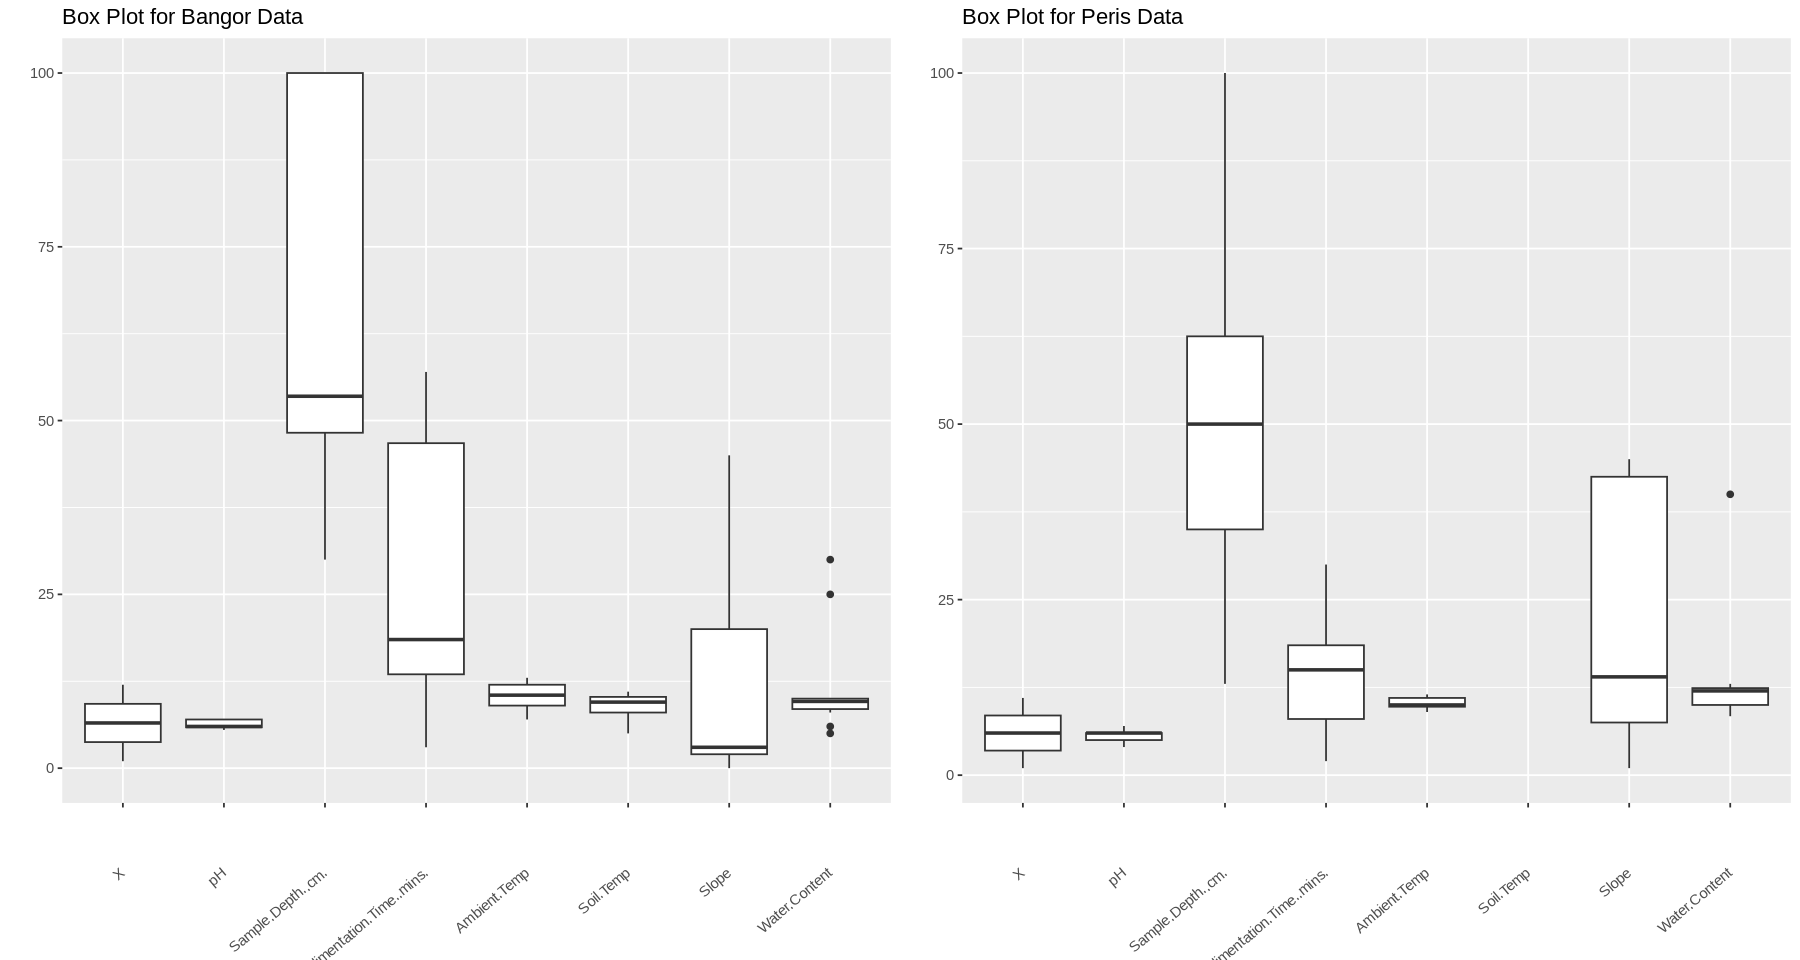

In [85]:
# Create copies of the data frames
data_bangor_copy <- data_bangor
data_peris_copy <- data_peris

# Remove the Soil.Type column from the copies
data_bangor_copy$Soil.Type <- NULL;
data_peris_copy$Soil.Type <- NULL;

# Melt the copied data into long format
melted_data_bangor <- melt(data_bangor_copy);
melted_data_peris <- melt(data_peris_copy);

# Create separate box plots
plot_bangor <- ggplot(melted_data_bangor, aes(x = variable, y = value)) +
  geom_boxplot() +
  labs(title = "Box Plot for Bangor Data",
       x = "",
       y = "") +
  theme(axis.text.x = element_text(angle = 40, vjust = 0.5, hjust = 1))

plot_peris <- ggplot(melted_data_peris, aes(x = variable, y = value)) +
  geom_boxplot() +
  labs(title = "Box Plot for Peris Data",
       x = "",
       y = "") +
  theme(axis.text.x = element_text(angle = 40, vjust = 0.5, hjust = 1));

# Arrange plots in a grid
grid.arrange(plot_bangor, plot_peris, ncol = 2);

# **Soil Composition**
##### Overall, these two locations have different compositions of soil types. Bangor has a wider variety, whereas Nant Peris seems to have a more limited range of soil types with a focus on gravel, sand, and clay-based compositions. Additionally, both locations have a notable presence of clay in their soil composition.

##### At the time I did not take photos of the soil samples (only 35mm films were available at the time) so i drew them. I also did not classify the soil qualities in a way which made it easy to compare samples from both transects.

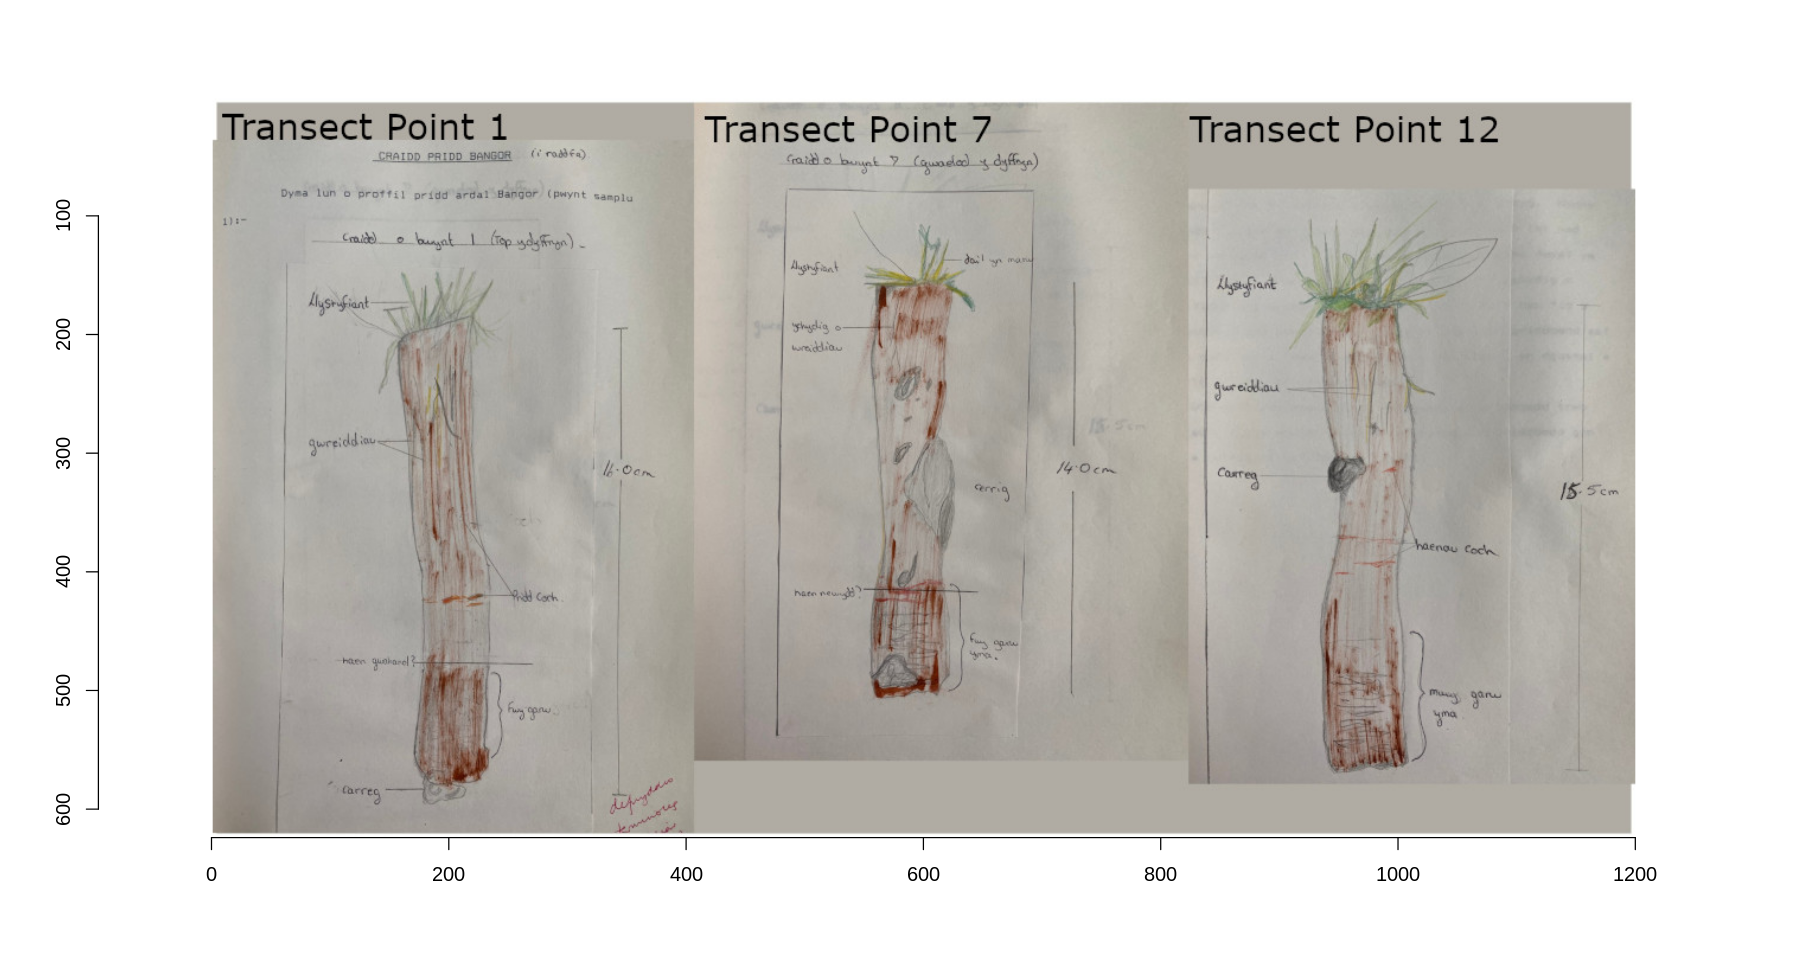

In [55]:
bangor_soil_sketches <- load.image("./soils_scaled.jpg") ;
plot(bangor_soil_sketches)

Distinct patterns emerge that reflect the unique topographical characteristics of each location. Notably, Nant Peris, characterized by steeper slopes and higher moisture levels, exhibits a greater clay-dominated soils. Approximately 45% of the sample points in Nant Peris exhibit clay soils, suggesting that the wetter conditions may favor the retention and accumulation of fine-grained particles. Moreover, Nant Peris also features a notable presence of soils combining gravel and sand, potentially indicative of sedimentation and erosion processes in this dynamic environment.

Conversely, in Bangor, where the terrain is less steep and the soil moisture levels are comparatively lower, clay soils are less prevalent, accounting for approximately 41.67% of the observed soil types. Instead, the dominant soil type in Bangor is clay, constituting 41.67% of the samples. This distribution may be influenced by the U-shaped valley of Bangor, which could provide more stable conditions for the retention of clay-rich soils.

Both locations exhibit a mix of other soil types such as sandy soils, soils rich in humus, and combinations of silt and clay, suggesting a diverse range of soil characteristics.

In summary, the soil type distributions in Bangor and Nant Peris underscore the significant influence of local topography on soil composition. The steeper and wetter conditions in Nant Peris favor the prevalence of clay-rich soils, while the more stable and less steep terrain in Bangor leads to a higher proportion of clay soils. This comparative analysis highlights how the physical nature of the valleys plays a pivotal role in shaping the soil landscape.


Bin width defaults to 1/30 of the range of the data. Pick better value with
`binwidth`.


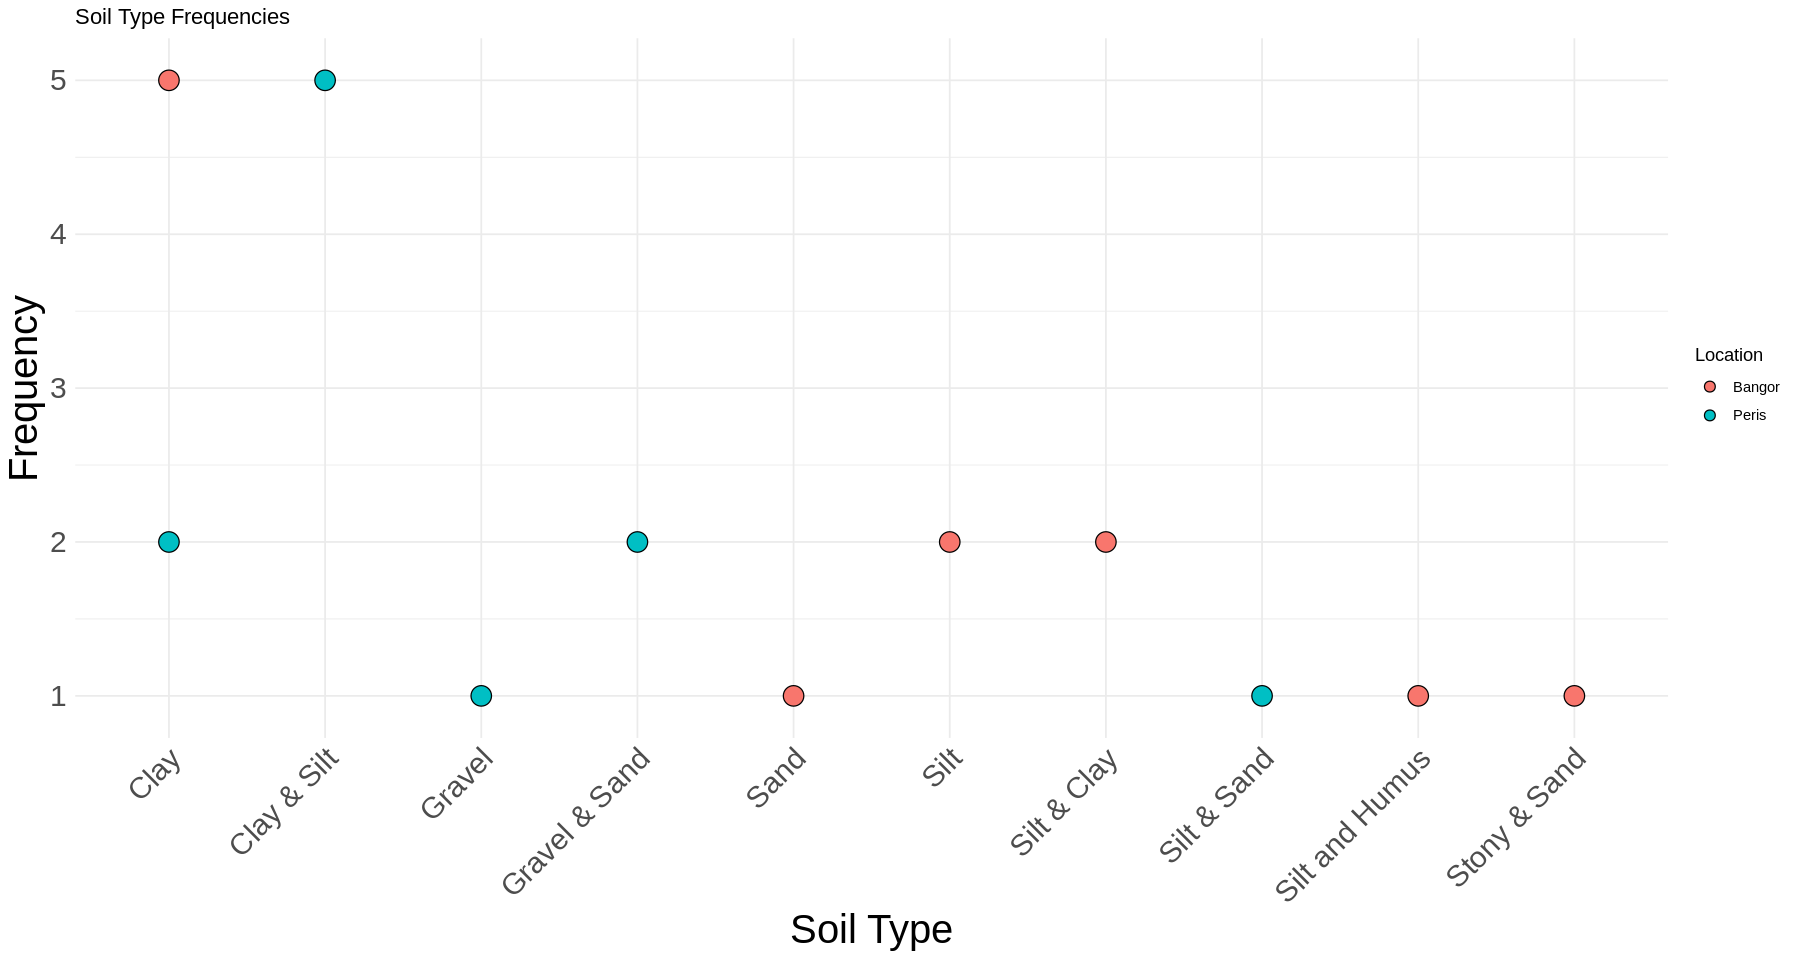

In [63]:
# Assuming you have data frames data_bangor and data_peris with a column named Soil.Type

# Load the ggplot2 library
library(ggplot2)
# Create frequency tables
freq_table_bangor <- sort(table(data_bangor$Soil.Type))
freq_table_peris <- sort(table(data_peris$Soil.Type))

# Combine the frequency tables into one data frame
combined_freq <- data.frame(Location = c(rep("Bangor", length(freq_table_bangor)), rep("Peris", length(freq_table_peris))),
                            Soil.Type = c(names(freq_table_bangor), names(freq_table_peris)),
                            Frequency = c(freq_table_bangor, freq_table_peris))

# Create the side-by-side dot plot
ggplot(combined_freq, aes(x = Soil.Type, y = Frequency, fill = Location)) +
  geom_dotplot(binaxis = "y", stackdir = "center", dotsize = 1) +
  labs(title = "Soil Type Frequencies", x = "Soil Type", y = "Frequency") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),  # Rotate x-axis labels by 45 degrees
        axis.text = element_text(size = 18),               # Enlarge axes font size
        axis.title = element_text(size = 24))


In [87]:
freq_table_peris


       Gravel   Silt & Sand          Clay Gravel & Sand   Clay & Silt 
            1             1             2             2             5 